In [1]:
# Import libraries
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
# NLTK VADER for sentiment analysis
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

finwiz_url = 'https://finviz.com/quote.ashx?t='

In [2]:
news_tables = {}
tickers = ['OCGN', 'LIZI', 'CAN', 'CDXC', 'EBON', 'DVAX', 'MVIS', 'APHA', 'WKHS', 'VERU']

for ticker in tickers:
    url = finwiz_url + ticker
    req = Request(url=url,headers={'user-agent': 'my-app/0.0.1'}) 
    response = urlopen(req)    
    # Read the contents of the file into 'html'
    html = BeautifulSoup(response)
    # Find 'news-table' in the Soup and load it into 'news_table'
    news_table = html.find(id='news-table')
    # Add the table to our dictionary
    news_tables[ticker] = news_table

In [3]:
# Read one single day of headlines for 'AMZN' 
amzn = news_tables['OCGN']
# Get all the table rows tagged in HTML with <tr> into 'amzn_tr'
amzn_tr = amzn.findAll('tr')

for i, table_row in enumerate(amzn_tr):
    # Read the text of the element 'a' into 'link_text'
    a_text = table_row.a.text
    # Read the text of the element 'td' into 'data_text'
    td_text = table_row.td.text
    # Print the contents of 'link_text' and 'data_text' 
    print(a_text)
    print(td_text)
    # Exit after printing 4 rows of data
    if i == 3:
        break

Should You Buy Ocugen for Its COVID Vaccine?
Feb-26-21 06:57AM  
1 Big Problem Ocugen Could Face That Investors Might Be Overlooking
Feb-24-21 06:09AM  
European Commission Grants Ocugen Orphan Medicinal Product Designation for Gene Therapy Product Candidate, OCU400, For the Treatment of Both Retinitis Pigmentosa and Leber Congenital Amaurosis
Feb-23-21 07:30AM  
Beware: Ocugen Is a Near $2 Billion Company That Has No Revenue
Feb-20-21 10:00AM  


In [4]:
parsed_news = []

# Iterate through the news
for file_name, news_table in news_tables.items():
    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text
        # get text from a only
        text = x.a.get_text() 
        # splite text in the td tag into a list 
        date_scrape = x.td.text.split()
        # if the length of 'date_scrape' is 1, load 'time' as the only element

        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        # else load 'date' as the 1st element and 'time' as the second    
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker = file_name.split('_')[0]
        
        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, text])
        
parsed_news

[['OCGN',
  'Feb-26-21',
  '06:57AM',
  'Should You Buy Ocugen for Its COVID Vaccine?'],
 ['OCGN',
  'Feb-24-21',
  '06:09AM',
  '1 Big Problem Ocugen Could Face That Investors Might Be Overlooking'],
 ['OCGN',
  'Feb-23-21',
  '07:30AM',
  'European Commission Grants Ocugen Orphan Medicinal Product Designation for Gene Therapy Product Candidate, OCU400, For the Treatment of Both Retinitis Pigmentosa and Leber Congenital Amaurosis'],
 ['OCGN',
  'Feb-20-21',
  '10:00AM',
  'Beware: Ocugen Is a Near $2 Billion Company That Has No Revenue'],
 ['OCGN',
  'Feb-19-21',
  '06:01AM',
  "Forget Ocugen! Here's a COVID Stock That Could Make You Richer Quicker"],
 ['OCGN', 'Feb-18-21', '06:15AM', 'Better Buy: Ocugen vs. Zomedica'],
 ['OCGN', 'Feb-18-21', '06:04AM', 'Should You Buy Ocugen Stock?'],
 ['OCGN',
  'Feb-17-21',
  '06:25AM',
  '2 High-Growth Robinhood Stocks That Could Realistically Triple Your Money in 2021'],
 ['OCGN', 'Feb-16-21', '12:38PM', 'Why Ocugen Stock Is Jumping Today'],
 ['O

In [5]:
# Instantiate the sentiment intensity analyzer
nltk.download('vader_lexicon')
vader = SentimentIntensityAnalyzer()

# Set column names
columns = ['ticker', 'date', 'time', 'headline']

# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)

# Iterate through the headlines and get the polarity scores using vader
scores = parsed_and_scored_news['headline'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')

# Convert the date column from string to datetime
parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date

parsed_and_scored_news.head(10)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/alekzandr/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,ticker,date,time,headline,neg,neu,pos,compound
0,OCGN,2021-02-26,06:57AM,Should You Buy Ocugen for Its COVID Vaccine?,0.000,1.000,0.000,0.0000
1,OCGN,2021-02-24,06:09AM,1 Big Problem Ocugen Could Face That Investors...,0.231,0.769,0.000,-0.4019
2,OCGN,2021-02-23,07:30AM,European Commission Grants Ocugen Orphan Medic...,0.000,0.927,0.073,0.2263
3,OCGN,2021-02-20,10:00AM,Beware: Ocugen Is a Near $2 Billion Company Th...,0.180,0.820,0.000,-0.2960
4,OCGN,2021-02-19,06:01AM,Forget Ocugen! Here's a COVID Stock That Could...,0.130,0.617,0.253,0.4199
5,OCGN,2021-02-18,06:15AM,Better Buy: Ocugen vs. Zomedica,0.000,0.580,0.420,0.4404
6,OCGN,2021-02-18,06:04AM,Should You Buy Ocugen Stock?,0.000,1.000,0.000,0.0000
7,OCGN,2021-02-17,06:25AM,2 High-Growth Robinhood Stocks That Could Real...,0.000,1.000,0.000,0.0000
8,OCGN,2021-02-16,12:38PM,Why Ocugen Stock Is Jumping Today,0.000,1.000,0.000,0.0000
9,OCGN,2021-02-15,06:45AM,Is Ocugen a Buy After Doubling Last Week?,0.000,1.000,0.000,0.0000


ticker  date      
APHA    2021-01-14    0.000000
        2021-01-15    0.142333
        2021-01-18    0.202300
        2021-01-19    0.000000
        2021-01-20    0.381800
                        ...   
WKHS    2021-02-21    0.177900
        2021-02-23    0.121114
        2021-02-24   -0.127387
        2021-02-25    0.238314
        2021-02-26   -0.051225
Name: compound, Length: 559, dtype: float64


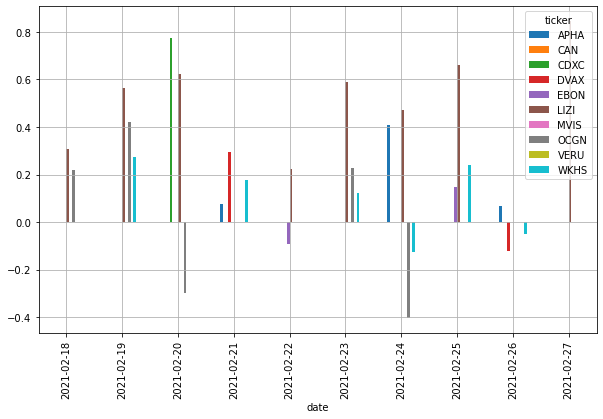

In [6]:
plt.rcParams['figure.figsize'] = [10, 6]

# Group by date and ticker columns from scored_news and calculate the mean
mean_scores = parsed_and_scored_news.groupby(['ticker','date']).mean()
print(mean_scores['compound'])

# Unstack the column ticker
mean_scores = mean_scores.unstack()
#print(mean_scores.head())

# Get the cross-section of compound in the 'columns' axis
mean_scores = mean_scores.xs('compound', axis="columns").transpose()
#print(mean_scores.head())

# Plot a bar chart with pandas
mean_scores.iloc[-10:,].plot(kind = 'bar')
plt.grid()

In [7]:
mean_scores

ticker,APHA,CAN,CDXC,DVAX,EBON,LIZI,MVIS,OCGN,VERU,WKHS
date,,,,,,,,,,
2018-12-19,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN
2018-12-28,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN
2019-01-03,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN
2019-01-25,NaN,NaN,NaN,NaN,NaN,NaN,0.3818,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-02-23,0.000000,NaN,NaN,NaN,NaN,0.589533,NaN,0.2263,0.0,0.121114
2021-02-24,0.406050,NaN,0.0,0.0000,NaN,0.471550,NaN,-0.4019,NaN,-0.127387
2021-02-25,0.000000,NaN,NaN,0.0000,0.148,0.658300,NaN,NaN,NaN,0.238314


In [8]:
print("APHA: {}".format(mean_scores['APHA'].iloc[-5:,].mean()*100))
print("CAN: {}".format(mean_scores['CAN'].iloc[-5:,].mean()*100))
print("CDXC: {}".format(mean_scores['CDXC'].iloc[-5:,].mean()*100))
print("DVAX: {}".format(mean_scores['DVAX'].iloc[-5:,].mean()*100))
print("EBON: {}".format(mean_scores['EBON'].iloc[-5:,].mean()*100))
print("LIZI: {}".format(mean_scores['LIZI'].iloc[-5:,].mean()*100))
print("MVIS: {}".format(mean_scores['MVIS'].iloc[-5:,].mean()*100))
print("OCGN: {}".format(mean_scores['OCGN'].iloc[-5:,].mean()*100))
print("VERU: {}".format(mean_scores['VERU'].iloc[-5:,].mean()*100))
print("WKHS: {}".format(mean_scores['WKHS'].iloc[-5:,].mean()*100))

APHA: 11.858125000000001
CAN: nan
CDXC: 0.0
DVAX: -4.013333333333334
EBON: 14.799999999999999
LIZI: 64.08958333333334
MVIS: nan
OCGN: -5.853333333333333
VERU: 0.0
WKHS: 4.520422619047619
